# GSEA analysis

This notebook is meant to plot the results of Gene Set Enrichment Analysis (GSEA) from the Cebpd KO or Cop1 KO RNA-seq data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn import linear_model
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import rpy2
%load_ext rpy2.ipython
import glob
import os
from matplotlib_venn import venn2, venn2_circles

In [2]:
def combine_gsea(mydir, ascending=True):
    mf = pd.read_csv(os.path.join(mydir, 'GO_MF.txt'), sep='\t')
    mf_cols = ['cytokine activity', 'chemokine activity', 'chemokine receptor binding']
    tmp_go = mf[mf['Description'].str.lower().isin(mf_cols)].copy().sort_values('NES', ascending=ascending)
    tmp_go['type'] = 'GO'
    kegg = pd.read_csv(os.path.join(mydir, 'KEGG.txt'), sep='\t')
    kegg_cols = ['Cytokine-cytokine receptor interaction', 'NOD-like receptor signaling pathway', 'Chemokine signaling pathway', 'JAK-STAT signaling pathway']
    tmp_kegg = kegg[kegg['Description'].isin(kegg_cols)].copy().sort_values('NES', ascending=ascending)
    tmp_kegg['type'] = 'KEGG'
    hallmark = pd.read_csv(os.path.join(mydir, 'HALLMARK.txt'), sep='\t')
    hallmark_cols =  ['HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_INFLAMMATORY_RESPONSE', 'HALLMARK_INTERFERON_ALPHA_RESPONSE']
    tmp_hallmark = hallmark[hallmark['Description'].isin(hallmark_cols)].copy().sort_values('NES', ascending=ascending)
    tmp_hallmark['type'] = 'HALLMARK'
    combined = pd.concat([tmp_hallmark, tmp_kegg, tmp_go])
    return combined

Display normalized enrichment scores from GSEA as a bar plot. Note, by changing the path variable, you can change which data set is visualized.

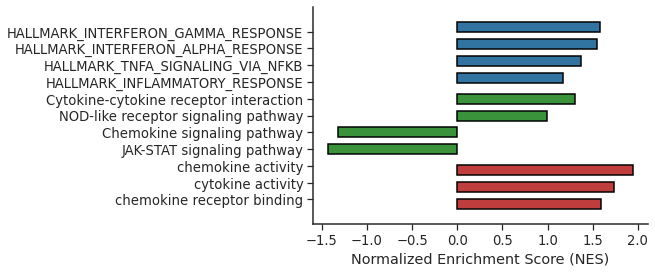

In [5]:
path = 'data/gsea_cebpd_analysis/Condition_CebpdKoSg1_VS_Rosa26_DESeq2_ConvertID/'
combined = combine_gsea(path, ascending=False)
        
with sns.axes_style('ticks'), sns.plotting_context('notebook', font_scale=1.2):
    sns.set_context(rc = {'patch.linewidth': 1.0})
    ax = sns.barplot(x='NES', y='Description', data=combined, hue='type', ecolor='black', orient='h', palette=[sns.color_palette()[0], sns.color_palette()[2], sns.color_palette()[3]])
    #ax.yaxis.tick_right()
    plt.ylabel('')
    plt.xlabel('Normalized Enrichment Score (NES)')
    sns.despine(right=True, left=False)
    plt.legend([],[], frameon=False)
    
    # change linewidths
    lw = 1.5
    plt.setp(ax.patches, linewidth=lw)
    ax.spines['left'].set_linewidth(lw)
    ax.spines['bottom'].set_linewidth(lw)
    
    #plt.xticks([0, -1, -2])
    
    # Loop over the bars, and adjust the width (and position, to keep the bar centred)
    for bar in ax.patches:
        y = bar.get_y()
        width = bar.get_height()
        bar.set_height(0.6)
        centre = y+width/2.

        bar.set_y(centre-(0.6)/2.)

        bar.set_edgecolor('black')
    plt.margins(y=0.1)
    #plt.savefig('figures/gsea_cebpdko.pdf')

In [4]:
combined[['Description', 'pvalue', 'NES', 'p.adjust']]

,Description,pvalue,NES,p.adjust
6,HALLMARK_INTERFERON_GAMMA_RESPONSE,0.000238,1.578327,0.001703
12,HALLMARK_INTERFERON_ALPHA_RESPONSE,0.003175,1.553111,0.012212
17,HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.007184,1.373903,0.019956
30,HALLMARK_INFLAMMATORY_RESPONSE,0.103500,1.171474,0.166936
116,Cytokine-cytokine receptor interaction,0.018324,1.300358,0.051056
270,NOD-like receptor signaling pathway,0.454839,0.994875,0.547149
128,Chemokine signaling pathway,0.027700,-1.317494,0.070001
98,JAK-STAT signaling pathway,0.009819,-1.431053,0.032332
78,chemokine activity,0.000232,1.942398,0.003198
58,cytokine activity,0.000047,1.733360,0.000856
